In [1]:
# implicit none
# integer ix,iy,n
# real x,y,r,xp,yp,rp,eps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[[ 1.  0.]
 [-1.  1.]]
0     0.000000
1    -0.111111
2    -0.222222
3    -0.333333
4    -0.444444
        ...   
95    0.444444
96    0.333333
97    0.222222
98    0.111111
99    0.000000
Name: x_prim, Length: 100, dtype: float64 0    -0.499990
1    -0.388879
2    -0.277768
3    -0.166657
4    -0.055546
        ...   
95    0.055566
96    0.166677
97    0.277788
98    0.388899
99    0.500010
Name: y_prim, Length: 100, dtype: float64


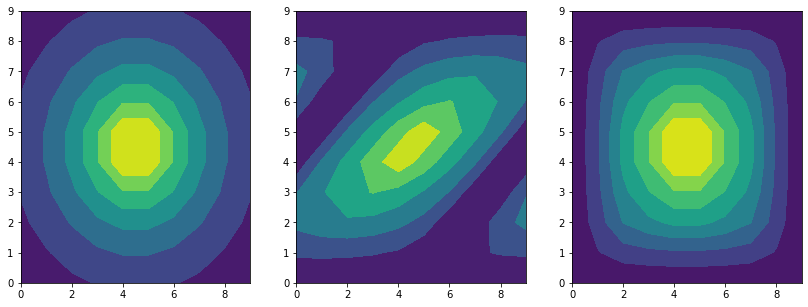

In [12]:

eps = 0.00001
def eq100(x):
    if(x < -0.25):
        xp=-1/(8*(1+2*x))
    elif(x < 0.25):
        xp=x
    else:
        xp=1/(8*(1-2*x))
    return xp

A = np.array([[1., 0.], [1., 1.]])
A_inv = np.linalg.inv(A)
print(A_inv)

Xs = np.linspace(-0.5, 0.5, 10) + eps
Ys = Xs

datas = []
for x in Xs:
    xp = eq100(x)
    for y in Ys:
        yp = eq100(y)

        r = np.linalg.norm(np.array([x, y]))
        rp = np.linalg.norm(np.array([xp, yp]))

        v = np.array([[x, y]])
        v_prim = v.dot(A_inv)
        x_prim, y_prim = v_prim[0, 0], v_prim[0, 1]
        x_primp, y_primp = eq100(x_prim), eq100(y_prim)
        rp_prim = np.linalg.norm(np.array([x_primp, y_primp]))

        data = [np.squeeze(i) for i in [x, y, xp, yp, x_prim, y_prim, x_primp, y_primp, r, rp_prim, np.exp(-3*r), np.exp(-3*rp), np.exp(-3*rp_prim)]]
        datas.append(data)


data = pd.DataFrame(datas, columns=['x', 'y', 'xp', 'yp', 'x_prim', 'y_prim', 'x_primp', 'y_primp', 'r', 'r_primp', 'exp_r', 'exp_rp', 'exp_r_primp'])

og = data.pivot(index='y', columns='x', values='exp_r')
cartesian = data.pivot(index='y', columns='x', values='exp_rp')
primitive = data.pivot(index='y', columns='x', values='exp_r_primp')

print(data['x_prim'], data['y_prim'])
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

axs[0].contourf(og)
axs[2].contourf(cartesian)
axs[1].contourf(primitive)

plt.show()
